<a href="https://colab.research.google.com/github/RITIKA-SHARMAA/ML/blob/main/9-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# SVM


In [1]:
import pandas as pd
from sklearn. datasets import load_iris
iris = load_iris()

In [2]:
iris. feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris. target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
len(iris.data)

150

In [5]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()

# add the 'target' column to represent the flower species.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

#  Explore the data by filtering, adding a flower name column,
# and creating scatter plots to visualize the relationship between features.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [9]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [10]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]    # segregating df based on different flowers for data visualization

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

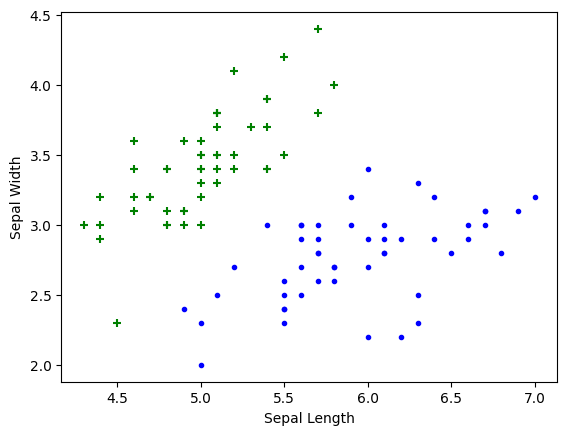

In [12]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

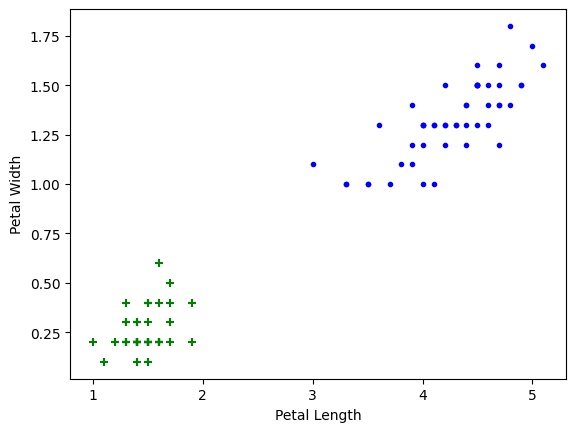

In [13]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

these seprations in the groups defines that we will bw using svm in this to train

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X = df.drop(['target','flower_name'], axis='columns')
y= df.target

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [18]:
len(X_train)

120

In [19]:
len(X_test)

30

In [20]:
len(X)

150

In [21]:
# model trained using SVM

from sklearn.svm import SVC
model = SVC()

In [22]:
model.fit(X_train, y_train)

#  class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)[source]

SVC()

In [23]:
model.score(X_test, y_test)

0.9666666666666667

In [26]:
 model.predict([[6.4, 3.2, 4.5, 1.5]]) # versicolor

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

# Tune parameters

1. Regularization (C) :  # more C >> case of overfit

In [27]:
model_C = SVC(C=1)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9666666666666667

In [28]:
model_C = SVC(C=10) # case of overfit
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9333333333333333

2. Gamma : nearest point to compare from

In [29]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.9

3. Kernel

In [30]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
model_linear_kernal.score(X_test, y_test)


1.0

Exercise

Train SVM classifier using sklearn digits dataset (i.e. from sklearn.datasets import load_digits) and then,


Measure accuracy of your model using different kernels such as rbf and linear.

Tune your model further using regularization and gamma parameters and try to come up with highest accurancy score

Use 80% of samples as training data size

In [7]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn import datasets
digits = load_digits()

In [2]:
digits.target


array([0, 1, 2, ..., 8, 9, 8])

In [4]:
dir(digits)


['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.target_names


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
digits = datasets.load_digits()

In [9]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

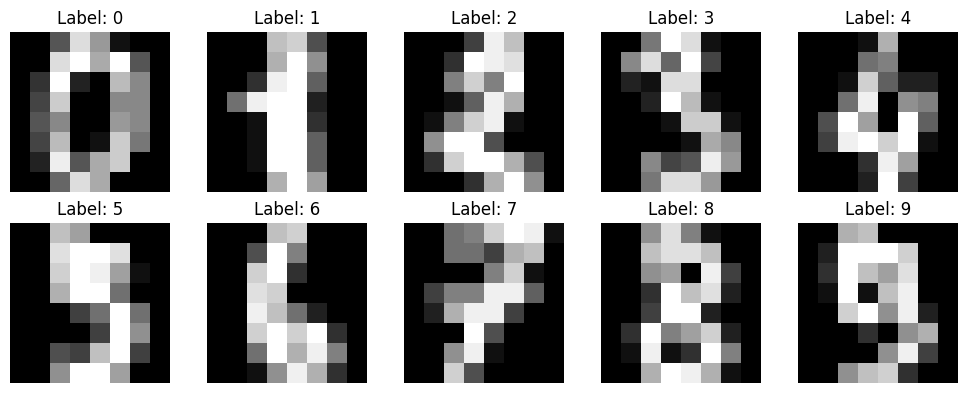

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
# Flatten the image data (convert 2D array to 1D)
X = digits.data  # Each row is a flattened image
y = digits.target  # Corresponding digit label


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Using RBF kernel**


In [17]:
from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

In [21]:
len(X_train)

1437

In [18]:
len(X_train)

1437

In [19]:
len(X_test)

360

In [22]:
rbf_model.fit(X_train, y_train)

SVC()

In [23]:
rbf_model.score(X_test,y_test)

0.9861111111111112

**Using Linear kernel**

In [24]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

SVC(kernel='linear')

In [25]:
linear_model.score(X_test,y_test)

0.9777777777777777

In [28]:
from sklearn.metrics import accuracy_score, classification_report

best_model = None
best_accuracy = 0
best_params = {}


C_values = [0.1, 1, 10]
gamma_values = [0.001, 0.01, 0.1]

for C in C_values:
    for gamma in gamma_values:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_accuracy:
            best_accuracy = acc
            best_model = model
            best_params = {'C': C, 'gamma': gamma}

print("\nBest Parameters for RBF Kernel:")
print(f"C: {best_params['C']}, Gamma: {best_params['gamma']}, Accuracy: {best_accuracy:.4f}")



Best Parameters for RBF Kernel:
C: 1, Gamma: 0.001, Accuracy: 0.9889


Kernel: linear, Accuracy: 0.9778
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

Kernel: rbf, Accuracy: 0.9861
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2   

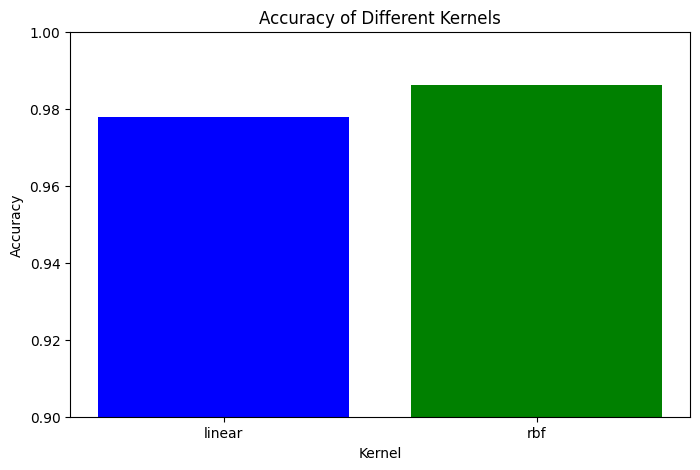

In [32]:
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store accuracy scores for each kernel
kernel_accuracies = {}

# Train and evaluate the SVM model with different kernels
for kernel in ['linear', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    kernel_accuracies[kernel] = acc
    print(f"Kernel: {kernel}, Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


plt.figure(figsize=(8, 5))
plt.bar(kernel_accuracies.keys(), kernel_accuracies.values(), color=['blue', 'green'])
plt.title("Accuracy of Different Kernels")
plt.ylabel("Accuracy")
plt.xlabel("Kernel")
plt.ylim(0.9, 1.0)
plt.show()